# How Transformers solve tasks

## 1. Transformer model for language

The Transformer was initially designed for machine translation, and since then, it has become the default architecture for solving all AI tasks. Some tasks lend themselves to the Transformer’s encoder structure, while others are better suited for the decoder. Still, other tasks make use of both the Transformer’s encoder-decoder structure.



### 1.1. How language models work


Language models work by being trained to predict the probability of a word given the context of surrounding words. This gives them a foundational understanding of language that can generalize to other tasks.



There are two main approaches for training a transformer model:



- **Masked language modeling (MLM)**: Used by encoder models like BERT, this approach randomly masks some tokens in the input and trains the model to predict the original tokens based on the surrounding context. This allows the model to learn bidirectional context (looking at words both before and after the masked word).

- **Causal language modeling (CLM)**: Used by decoder models like GPT, this approach predicts the next token based on all previous tokens in the sequence. The model can only use context from the left (previous tokens) to predict the next token.

### 1.2. Types of language models

In the Transformers library, language models generally fall into three architectural categories:



1. **Encoder-only models** (like BERT): These models use a bidirectional approach to understand context from both directions. They’re best suited for tasks that require deep understanding of text, such as classification, named entity recognition, and question answering.

2. **Decoder-only models** (like GPT, Llama): These models process text from left to right and are particularly good at text generation tasks. They can complete sentences, write essays, or even generate code based on a prompt.

3. **Encoder-decoder models** (like T5, BART): These models combine both approaches, using an encoder to understand the input and a decoder to generate output. They excel at sequence-to-sequence tasks like translation, summarization, and question answering.

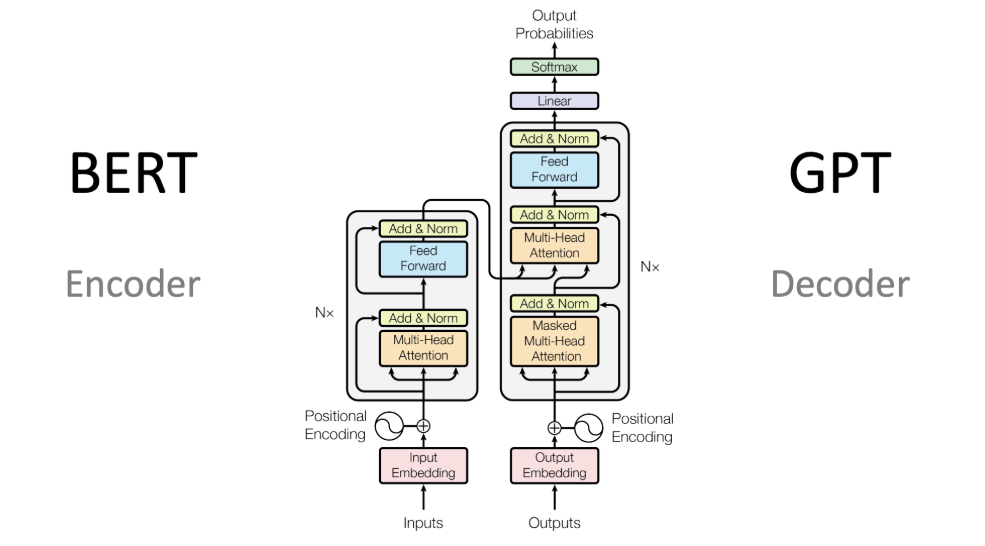

### 1.3. Text generation

Text generation involves creating coherent and contextually relevant text based on a prompt or input.

In this section we will discuss about GPT-2. GPT-2 is a decoder-only model pretrained on a large amount of text. It can generate convincing text given a prompt and complete other NLP tasks like question answering despite not being explicitly trained to.

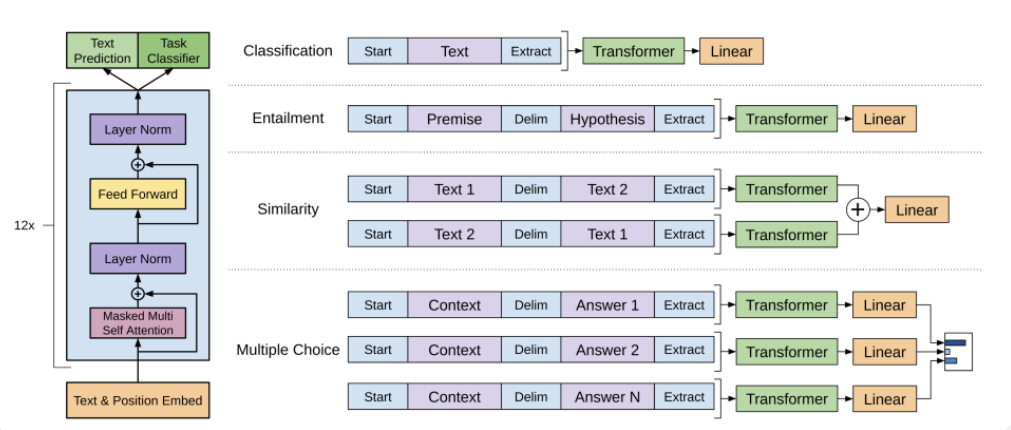

1. GPT-2 uses byte pair encoding (BPE) to tokenize words and generate a token embedding. Positional encodings are added to the token embeddings to indicate the position of each token in the sequence. The input embeddings are passed through multiple decoder blocks to output some final hidden state.

2. The output from the decoder is passed to a language modeling head, which performs a linear transformation to convert the hidden states into logits. The label is the next token in the sequence, which are created by shifting the logits to the right by one. The cross-entropy loss is calculated between the shifted logits and the labels to output the next most likely token.

GPT-2’s pretraining objective is based entirely on causal language modeling, predicting the next word in a sequence. This makes GPT-2 especially good at tasks that involve generating text.



### 1.4. Text classification

Text classification involves assigning predefined categories to text documents, such as sentiment analysis, topic classification, or spam detection.



BERT is an encoder-only model and is the first model to effectively implement deep bidirectionality to learn richer representations of the text by attending to words on both sides.



1. BERT uses WordPiece tokenization to generate a token embedding of the text. To tell the difference between a single sentence and a pair of sentences, a special [SEP] token is added to differentiate them. A special [CLS] token is added to the beginning of every sequence of text. The final output with the [CLS] token is used as the input to the classification head for classification tasks. BERT also adds a segment embedding to denote whether a token belongs to the first or second sentence in a pair of sentences.

2. BERT is pretrained with two objectives: masked language modeling and next-sentence prediction. In masked language modeling, some percentage of the input tokens are randomly masked, and the model needs to predict these. This solves the issue of bidirectionality, where the model could cheat and see all the words and “predict” the next word. The final hidden states of the predicted mask tokens are passed to a feedforward network with a softmax over the vocabulary to predict the masked word.

3. The second pretraining object is next-sentence prediction. The model must predict whether sentence B follows sentence A. Half of the time sentence B is the next sentence, and the other half of the time, sentence B is a random sentence. The prediction, whether it is the next sentence or not, is passed to a feedforward network with a softmax over the two classes (`IsNext` and `NotNext`).

4. The input embeddings are passed through multiple encoder layers to output some final hidden states.

To use the pretrained model for text classification, add a sequence classification head on top of the base BERT model. The sequence classification head is a linear layer that accepts the final hidden states and performs a linear transformation to convert them into logits. The cross-entropy loss is calculated between the logits and target to find the most likely label.



### 1.5. Token classification

Token classification involves assigning a label to each token in a sequence, such as in named entity recognition or part-of-speech tagging.



To use BERT for token classification tasks like named entity recognition (NER), add a token classification head on top of the base BERT model. The token classification head is a linear layer that accepts the final hidden states and performs a linear transformation to convert them into logits. The cross-entropy loss is calculated between the logits and each token to find the most likely label.


### 1.6. Question answering

Question answering involves finding the answer to a question within a given context or passage.



To use BERT for question answering, add a span classification head on top of the base BERT model. This linear layer accepts the final hidden states and performs a linear transformation to compute the `span` start and end logits corresponding to the answer. The cross-entropy loss is calculated between the logits and the label position to find the most likely span of text corresponding to the answer.



### 1.7 . Summarization

Summarization involves condensing a longer text into a shorter version while preserving its key information and meaning.



Encoder-decoder models like BART and T5 are designed for the sequence-to-sequence pattern of a summarization task. We’ll explain how BART works in this section, and then you can try finetuning T5 at the end.

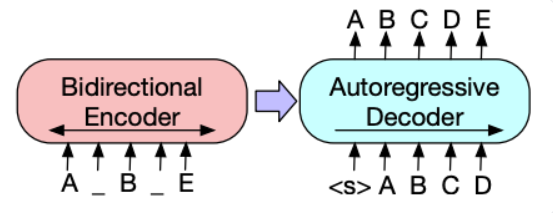

1. BART’s encoder architecture is very similar to BERT and accepts a token and positional embedding of the text. BART is pretrained by corrupting the input and then reconstructing it with the decoder. Unlike other encoders with specific corruption strategies, BART can apply any type of corruption. The `text infilling` corruption strategy works the best though. In `text infilling`, a number of text spans are replaced with a single `[mask]` token. This is important because the model has to predict the masked tokens, and it teaches the model to predict the number of missing tokens. The input embeddings and masked spans are passed through the encoder to output some final hidden states, but unlike BERT, BART doesn’t add a final feedforward network at the end to predict a word.

2. The encoder’s output is passed to the decoder, which must predict the masked tokens and any uncorrupted tokens from the encoder’s output. This gives additional context to help the decoder restore the original text. The output from the decoder is passed to a language modeling head, which performs a linear transformation to convert the hidden states into logits. The cross-entropy loss is calculated between the logits and the label, which is just the token shifted to the right.

### 1.8. Translation

Translation involves converting text from one language to another while preserving its meaning. Translation is another example of a sequence-to-sequence task, which means you can use an encoder-decoder model like BART or T5 to do it. We’ll explain how BART works in this section, and then you can try finetuning T5 at the end.

BART adapts to translation by adding a separate randomly initialized encoder to map a source language to an input that can be decoded into the target language. This new encoder’s embeddings are passed to the pretrained encoder instead of the original word embeddings. The source encoder is trained by updating the source encoder, positional embeddings, and input embeddings with the cross-entropy loss from the model output. The model parameters are frozen in this first step, and all the model parameters are trained together in the second step. BART has since been followed up by a multilingual version, mBART, intended for translation and pretrained on many different languages.



## 2. Modalities beyond text

Transformers are not limited to text. They can also be applied to other modalities like speech and audio, images, and video. Of course, on this course we will focus on text, but we can briefly introduce the other modalities.



### 2.1. Speech and audio

Whisper is a encoder-decoder (sequence-to-sequence) transformer pretrained on 680,000 hours of labeled audio data. This amount of pretraining data enables zero-shot performance on audio tasks in English and many other languages. The decoder allows Whisper to map the encoders learned speech representations to useful outputs, such as text, without additional fine-tuning. Whisper just works out of the box.

### 2.2. Automatic speech recognition

To use the pretrained model for automatic speech recognition, you leverage its full encoder-decoder structure. The encoder processes the audio input, and the decoder autoregressively generates the transcript token by token. When fine-tuning, the model is typically trained using a standard sequence-to-sequence loss (like cross-entropy) to predict the correct text tokens based on the audio input.



In [ ]:
from transformers import pipeline

transciber = pipeline(task="automatic-speech-recognition", model="openai/whisper-base.en")
transciber(
    "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac"
)

### 2.3. Computer vision

There are two ways to approach computer vision tasks:

1. Split an image into a sequence of patches and process them in parallel with a Transformer.

2. Use a modern CNN, like ConvNeXT, which relies on convolutional layers but adopts modern network designs.

ViT and ConvNeXT are commonly used for image classification, but for other vision tasks like object detection, segmentation, and depth estimation, we’ll look at DETR, Mask2Former and GLPN, respectively; these models are better suited for those tasks.



ViT and ConvNeXT can both be used for image classification; the main difference is that ViT uses an attention mechanism while ConvNeXT uses convolutions.

ViT replaces convolutions entirely with a pure Transformer architecture. If you’re familiar with the original Transformer, then you’re already most of the way toward understanding ViT.

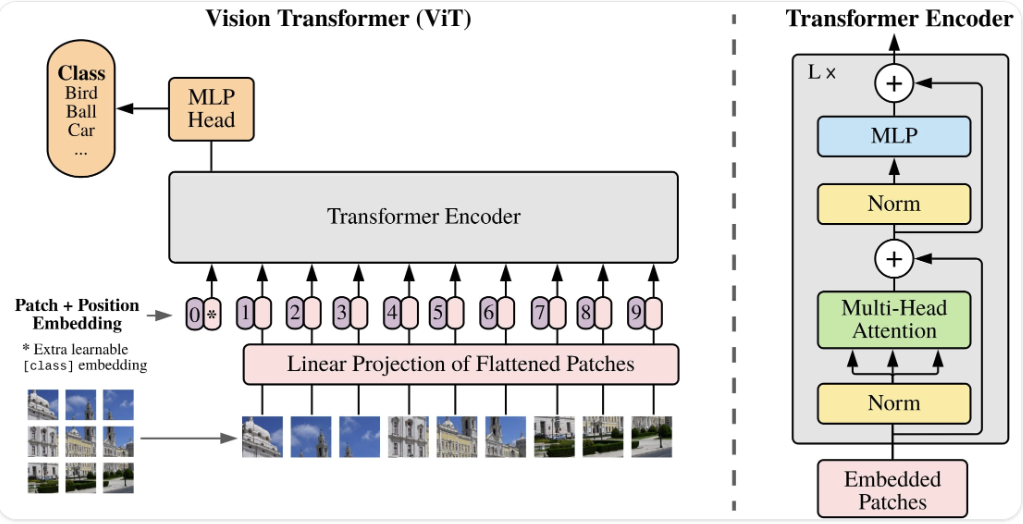

The main change ViT introduced was in how images are fed to a Transformer:

1. An image is split into square non-overlapping patches, each of which gets turned into a vector or patch embedding. The patch embeddings are generated from a convolutional 2D layer which creates the proper input dimensions (which for a base Transformer is 768 values for each patch embedding). If you had a 224x224 pixel image, you could split it into 196 16x16 image patches. Just like how text is tokenized into words, an image is “tokenized” into a sequence of patches.

2. A learnable embedding - a special `[CLS]` token - is added to the beginning of the patch embeddings just like BERT. The final hidden state of the `[CLS]` token is used as the input to the attached classification head; other outputs are ignored. This token helps the model learn how to encode a representation of the image.

3. The last thing to add to the patch and learnable embeddings are the position embeddings because the model doesn’t know how the image patches are ordered. The position embeddings are also learnable and have the same size as the patch embeddings. Finally, all of the embeddings are passed to the Transformer encoder.

4. The output, specifically only the output with the `[CLS]` token, is passed to a multilayer perceptron head (MLP). ViT’s pretraining objective is simply classification. Like other classification heads, the MLP head converts the output into logits over the class labels and calculates the cross-entropy loss to find the most likely class.